In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df = pd.read_csv("/Users/bennyha/Downloads/Caschool.csv")

In [27]:
df.head()

,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


## Question 1.1
I assumed variables such as *str* (student teacher ratio), *expnstu* (expenditure per student) *avginc* (district average income) will have
relationship with target variable (test score)

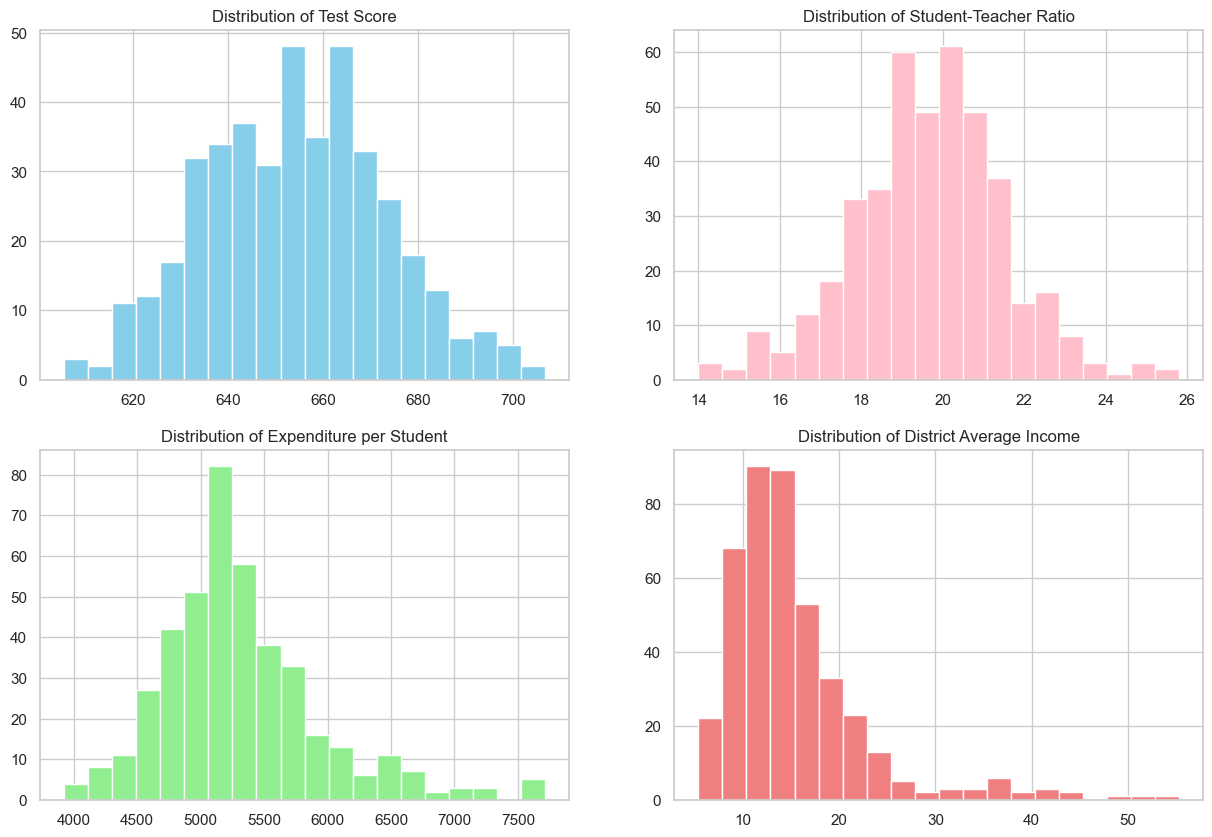

In [70]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(df['testscr'], bins=20, color='skyblue')
axes[0, 0].set_title('Distribution of Test Score')

axes[0, 1].hist(df['str'], bins=20, color='pink')
axes[0, 1].set_title('Distribution of Student-Teacher Ratio')

axes[1, 0].hist(df['expnstu'], bins=20, color='lightgreen')
axes[1, 0].set_title('Distribution of Expenditure per Student')

axes[1, 1].hist(df['avginc'], bins=20, color='lightcoral')
axes[1, 1].set_title('Distribution of District Average Income')

plt.show()


## Question 1.2

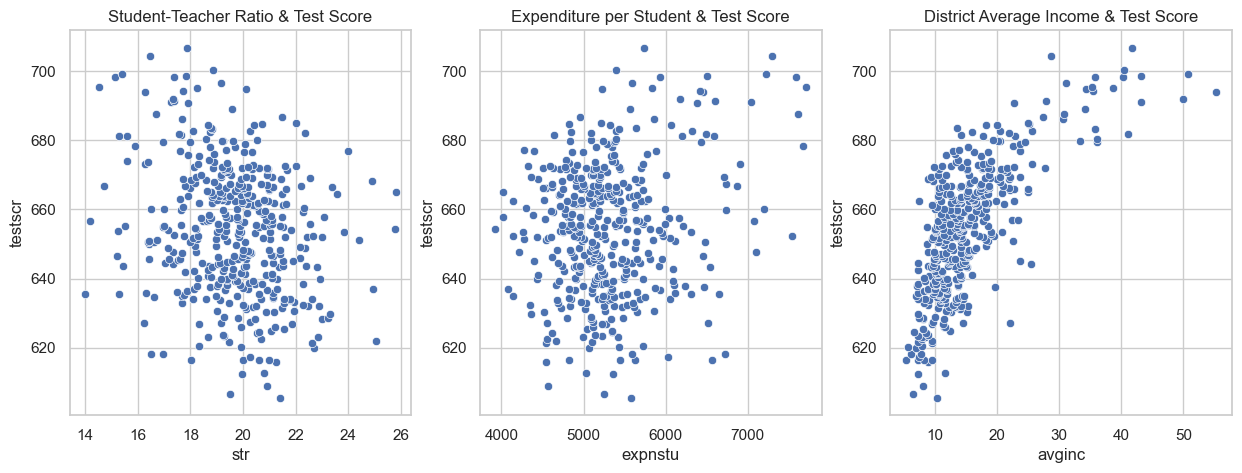

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x='str', y='testscr', data=df, ax=axes[0])
axes[0].set_title('Student-Teacher Ratio & Test Score')

sns.scatterplot(x='expnstu', y='testscr', data=df, ax=axes[1])
axes[1].set_title('Expenditure per Student & Test Score')

sns.scatterplot(x='avginc', y='testscr', data=df, ax=axes[2])
axes[2].set_title('District Average Income & Test Score')

plt.show()


## Question 1.3

Since the data have some outliers, i think using StandardScaler does not have a drastic effect.  

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

y = df['testscr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'KNN': KNeighborsRegressor(),
    'Linear Regression (OLS)': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

for model_name, model in models.items():
    print(f"Model: {model_name}")

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f'CV Scores: {cv_scores}')
    print(f'Mean CV Score: {cv_scores.mean()}')

    model.fit(X_train_scaled, y_train)
    y_pred_scaled = model.predict(X_test_scaled)
    mse_scaled = mean_squared_error(y_test, y_pred_scaled)
    print(f'Mean squared error with scaling: {mse_scaled}')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean squared error without scaling: {mse}')

    print('\n')


Model: KNN
CV Scores: [0.37470589 0.50488442 0.26668696 0.55144221 0.31763508]
Mean CV Score: 0.40307091110994503
Mean squared error with scaling: 220.1580832999416
Mean squared error without scaling: 456.4444427929515


Model: Linear Regression (OLS)
CV Scores: [0.43995755 0.55655507 0.27151553 0.61842893 0.31909075]
Mean CV Score: 0.44110956543485147
Mean squared error with scaling: 192.15677207252924
Mean squared error without scaling: 192.15677207252628


Model: Ridge
CV Scores: [0.43953099 0.55607446 0.27308144 0.61790611 0.32018996]
Mean CV Score: 0.44135659365354785
Mean squared error with scaling: 192.51527246120517
Mean squared error without scaling: 192.15463088177728


Model: Lasso
CV Scores: [0.42771403 0.53308145 0.29620451 0.59591291 0.31911189]
Mean CV Score: 0.4344049577420308
Mean squared error with scaling: 202.45827835748347
Mean squared error without scaling: 191.95322178490383




## Question 1.4

It seems like result has improved since error rate become lower.

In [73]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

y = df['testscr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
}
param_grid_ridge = {
    'alpha': [0.1, 1, 10,10000]
}
param_grid_lasso = {
    'alpha': [0.1, 1, 10,10000]
}

models = {
    'KNN': (KNeighborsRegressor(), param_grid_knn),
    'Linear Regression (OLS)': (LinearRegression(), {}),
    'Ridge': (Ridge(), param_grid_ridge),
    'Lasso': (Lasso(), param_grid_lasso)
}

for model_name, (model, param_grid) in models.items():
    print(f"Model: {model_name}")

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_pred_scaled = best_model.predict(X_test_scaled)
    mse_scaled = mean_squared_error(y_test, y_pred_scaled)
    print(f'Best parameters: {best_params}')
    print(f'Mean squared error with scaling: {mse_scaled}')

    print('\n')


Model: KNN
Best parameters: {'n_neighbors': 7}
Mean squared error with scaling: 207.58411747491405


Model: Linear Regression (OLS)
Best parameters: {}
Mean squared error with scaling: 192.15677207252924


Model: Ridge
Best parameters: {'alpha': 10}
Mean squared error with scaling: 195.78171780600366


Model: Lasso
Best parameters: {'alpha': 0.1}
Mean squared error with scaling: 192.8687444797968




## Question 1.5

Both result shows, avginc is the important variable for the test score (dependent variable)

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

y = df['testscr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_ridge = {
    'alpha': [0.1, 1, 10,10000]
}
param_grid_lasso = {
    'alpha': [0.1, 1, 10,10000]
}

models = {
    'Ridge': (Ridge(), param_grid_ridge),
    'Lasso': (Lasso(), param_grid_lasso)
}

for model_name, (model, param_grid) in models.items():
    print(f"Model: {model_name}")

    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Best parameters: {best_params}')
    print(f'Mean squared error: {mse}')

    if model_name in ['Ridge', 'Lasso']:
        print('Coefficients:')
        for feature, coef in zip(X.columns, best_model.coef_):
            print(f'{feature}: {coef}')
    
    print('\n')


Model: Ridge
Best parameters: {'alpha': 10}
Mean squared error: 192.13742802593296
Coefficients:
expnstu: -0.0033637367831583606
str: -1.4976366351381973
avginc: 1.7476222701601782


Model: Lasso
Best parameters: {'alpha': 0.1}
Mean squared error: 192.0910401125649
Coefficients:
expnstu: -0.0033164592234189803
str: -1.4721473723096228
avginc: 1.747044859118057




## Question 1.6 
Considering both the mean squared error and the best parameters, Ridge and Lasso models have the lowest mean squared error and reasonable parameter values.<br> I would choose either the Ridge or Lasso model as the final model to predict new data.

 